In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
df = pd.read_excel("Womens Clothing Reviews .xlsx")

In [3]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [5]:
df.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [6]:
df[df['Review Text'].isnull()]['Review Title'].value_counts()

Such a beautiful dress!    1
Name: Review Title, dtype: int64

In [7]:
dft = df.copy()

In [8]:
for col in ['Review Text', 'Category', 'Subcategory1', 'SubCategory2']:
    dft = dft[dft[col].notnull()]

In [9]:
df.isnull().sum()/len(df)*100

Product ID         0.000000
Category           0.059610
Subcategory1       0.059610
SubCategory2       0.059610
Location           0.000000
Channel            0.000000
Customer Age       0.000000
Review Title      16.222430
Review Text        3.597888
Rating             0.000000
Recommend Flag     0.000000
dtype: float64

In [10]:
len(dft)/len(df)

0.9634675977177893

# EDA

### Clothing ID Distribution

#### Popularity of products

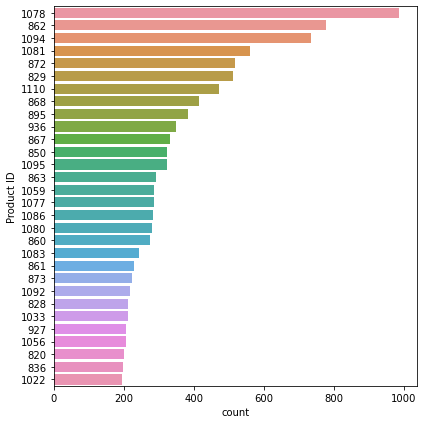

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(y='Product ID', data= dft[dft["Product ID"].isin(dft["Product ID"].value_counts()[:30].index)],
             order = dft["Product ID"].value_counts()[:30].index);
plt.tight_layout()

In [12]:
dft[dft['Product ID'].isin([1078, 862, 1094, 1081])][["Review Title", "Category","Subcategory1","SubCategory2"]]\
.describe().T.drop('count', axis=1)

,unique,top,freq
Review Title,2171,Beautiful dress,24
Category,2,General,1708
Subcategory1,2,Dresses,2283
SubCategory2,2,Dresses,2283


In [13]:

def displot(data, title, num=1,bins=[30]):
    sns.set_style('whitegrid')
    f, ax = plt.subplots(1,num, figsize=(10,5))

    if num==1:
        
        sns.distplot(data, bins=bins[0])
    else:
        for i,d in enumerate(data):
            sns.distplot(d, bins=bins[i], ax=ax[i])
    plt.title(title)
    plt.ylabel('Density')

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


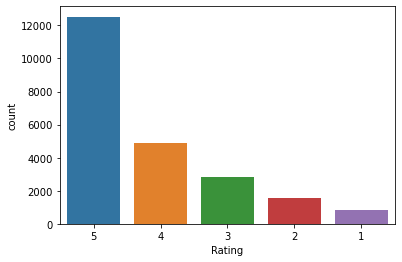

In [14]:
sns.countplot(dft['Rating'],order=range(5,0,-1));

In [15]:
def cplot(data, num=1, size=7):
    sns.set_style('whitegrid')
    f, ax = plt.subplots(1,num, figsize=(size*num,6))

    if num==1:
        
        sns.countplot(data, order=data.value_counts().sort_values(ascending=False).index, palette='viridis')
    else:
        for i,d in enumerate(data):
            sns.countplot(d, order=d.value_counts().sort_values(ascending=False).index, palette='viridis', ax=ax[i])
    plt.tight_layout()

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


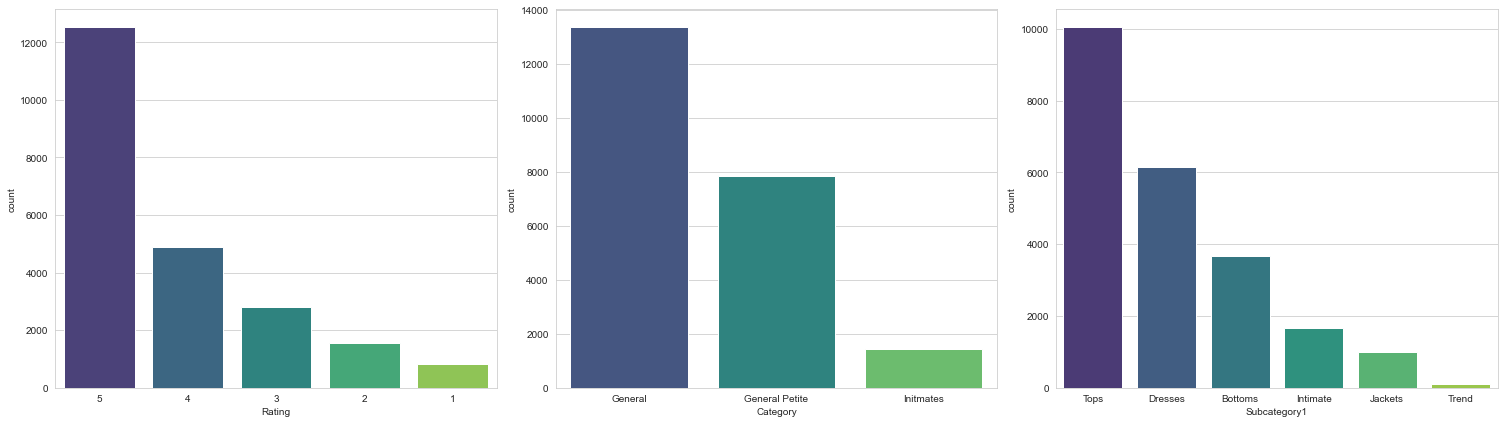

In [16]:
cplot([dft['Rating'], dft['Category'], dft['Subcategory1']], num=3)

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


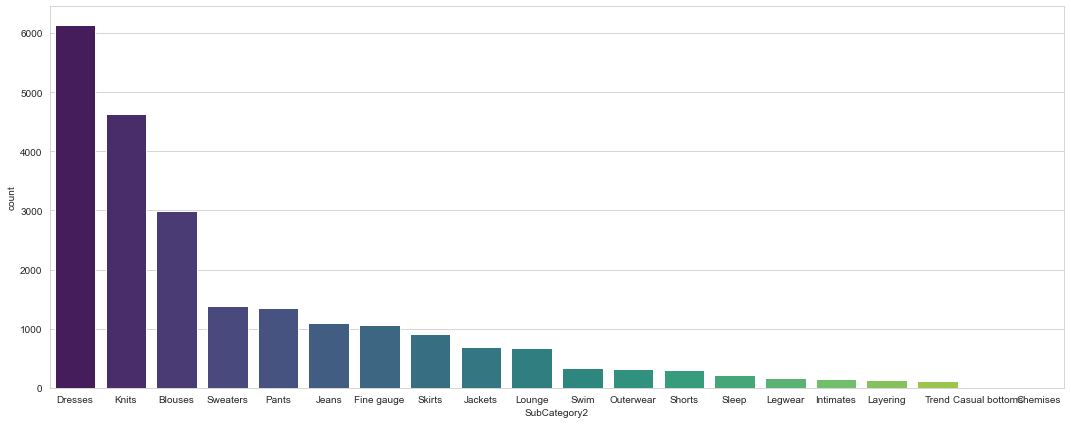

In [17]:
cplot(dft['SubCategory2'], size=15)

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


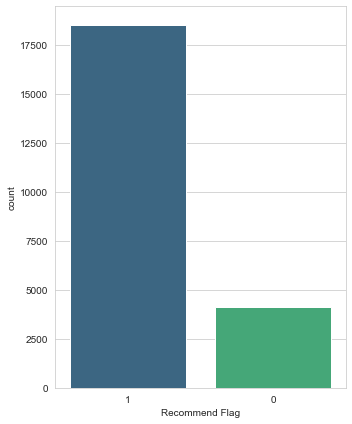

In [18]:
cplot(dft['Recommend Flag'], size=5)

## Multivariate Analysis

### Categorical vs Categorical Variables

In [19]:
def highlight_max(s):
    '''
    highlight the maximum in a Series.
    '''
    is_max = s == s.max()
    return ['background-color: darkorange' if v else '' for v in is_max]
cm = pd.crosstab(dft['Category'], dft['Subcategory1'], normalize='index').mul(100).round(0)
cm.style.apply(highlight_max, axis=1)


Subcategory1,Bottoms,Dresses,Intimate,Jackets,Tops,Trend
Category,,,,,,
General,18.000000,27.000000,0.000000,5.000000,49.000000,1.000000
General Petite,16.000000,32.000000,3.000000,5.000000,44.000000,0.000000
Initmates,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Correlation')

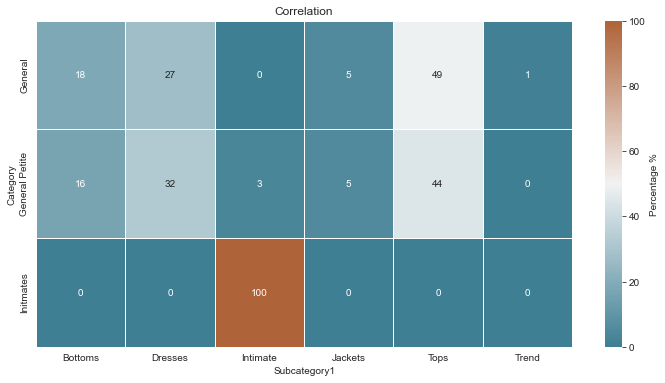

In [20]:
plt.subplots(figsize=(12,6))
sns.heatmap(pd.crosstab(dft['Category'], dft['Subcategory1'],normalize='index').mul(100).round(0),\
            annot=True, linewidth=0.5,\
            cmap=sns.diverging_palette(220, 30, n=200),fmt='g',\
            cbar_kws={'label': 'Percentage %'});
plt.title('Correlation')

Text(0.5, 1.0, 'Correlation')

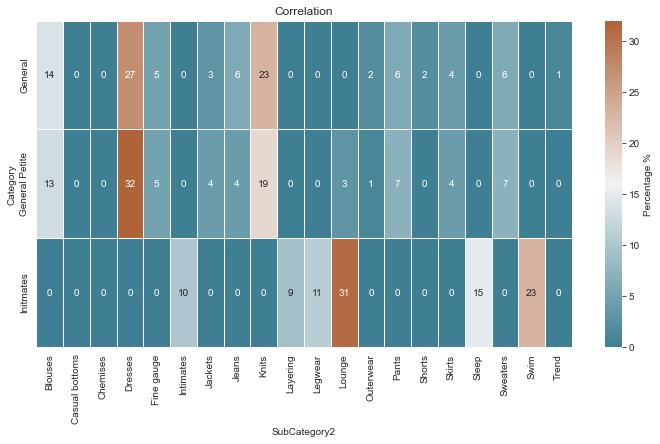

In [21]:
plt.subplots(figsize=(12,6))
sns.heatmap(pd.crosstab(dft['Category'], dft['SubCategory2'],normalize='index').mul(100).round(0),\
            annot=True, linewidth=0.5,\
            cmap=sns.diverging_palette(220, 30, n=200),fmt='g',\
            cbar_kws={'label': 'Percentage %'});
plt.title('Correlation')

Text(0.5, 1.0, 'Correlation')

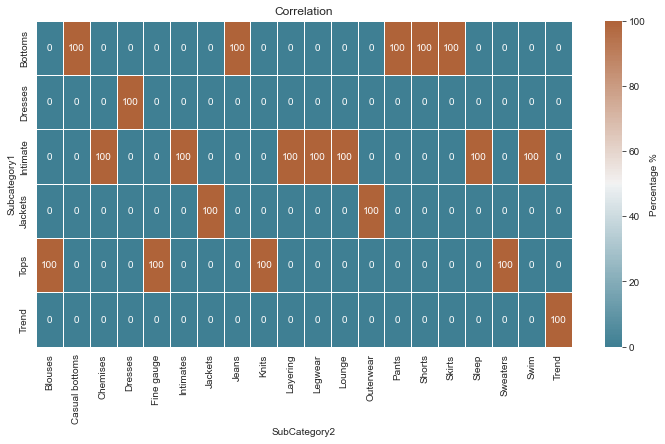

In [22]:
plt.subplots(figsize=(12,6))
sns.heatmap(pd.crosstab(dft['Subcategory1'], dft['SubCategory2'],normalize='columns').mul(100).round(0),\
            annot=True, linewidth=0.5,\
            cmap=sns.diverging_palette(220, 30, n=200),fmt='g',\
            cbar_kws={'label': 'Percentage %'});
plt.title('Correlation')

In [23]:
dft[['Category', 'Subcategory1', 'SubCategory2']].apply(lambda x : pd.factorize(x)[0])+1

,Category,Subcategory1,SubCategory2
0,1,1,1
1,2,2,2
2,2,2,2
3,3,3,3
4,2,4,4
...,...,...,...
23481,3,2,2
23482,3,4,5
23483,3,2,2
23484,2,2,2


In [24]:
from scipy.stats import chisquare

In [25]:
dd = dft[['Category', 'Subcategory1', 'SubCategory2']].apply(lambda x : pd.factorize(x)[0])+1

In [26]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2, p, dof, _  = ss.chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return (np.sqrt(phi2corr / min((kcorr-1), (rcorr-1))), p, dof)

In [27]:
cat_col = ['Category', 'Subcategory1', 'SubCategory2']

In [28]:
V = []
for cat1 in cat_col:
    for cat2 in cat_col:
        ct = pd.crosstab(dft[cat1], dft[cat2], normalize='index').mul(100).round(0)
        if cat1 == 'SubCategory2' or (cat2== 'SubCategory2'):
            v, _, _ = cramers_v(ct.values+0.1) ## since empty rows and columns result in error (division by 0)
        else:
            v, _, _ = cramers_v(ct.values)
        V.append(v)

In [29]:
cat_df = pd.DataFrame(data =np.array(V).reshape(3,3), index=cat_col, columns=cat_col)

In [30]:
cat_df.style.apply(highlight_max, axis=1)

,Category,Subcategory1,SubCategory2
Category,1.000000,0.685066,0.642323
Subcategory1,0.654187,1.000000,0.969538
SubCategory2,0.719389,0.987969,0.980206


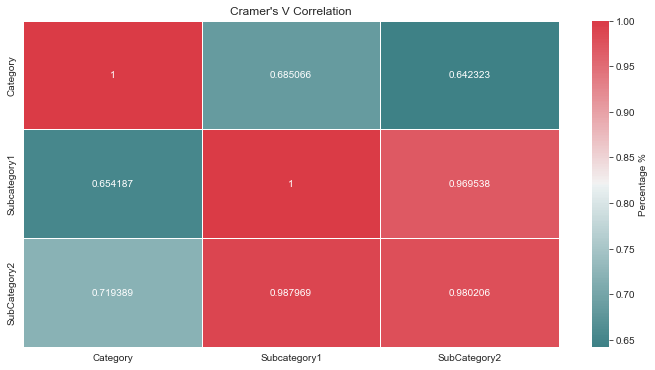

In [31]:
plt.subplots(figsize=(12,6))
sns.heatmap(cat_df,\
            annot=True, linewidth=0.5,\
            cmap=sns.diverging_palette(200, 10, n=200),fmt='g',\
            cbar_kws={'label': 'Percentage %'});
plt.title("Cramer's V Correlation");


### Numerical vs Numerical Variables

In [32]:
num_col = dft.select_dtypes(include=['int64']).columns
num_col

Index(['Product ID', 'Customer Age', 'Rating', 'Recommend Flag'], dtype='object')

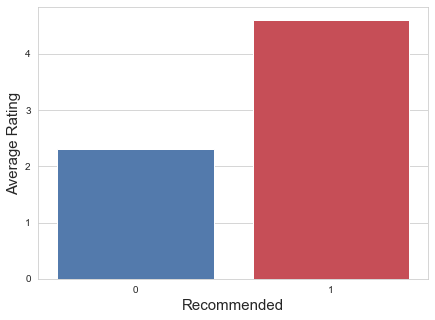

In [33]:
f, ax = plt.subplots(figsize=(7,5))
b = sns.barplot(y = 'Rating',x= [0,1], \
            data =dft[['Rating', 'Recommend Flag']].groupby('Recommend Flag').mean(),\
           palette=sns.diverging_palette(250, 10, n=2));
b.set_xlabel('Recommended', size=15)
b.set_ylabel('Average Rating', size=15);

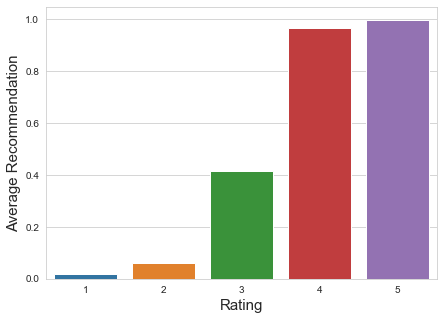

In [34]:
f, ax = plt.subplots(figsize=(7,5))
b = sns.barplot(y = 'Recommend Flag',x= [1,2,3,4,5], \
            data =dft[['Rating', 'Recommend Flag']].groupby('Rating').mean(),\
           );
b.set_xlabel('Rating', size=15)
b.set_ylabel('Average Recommendation', size=15);

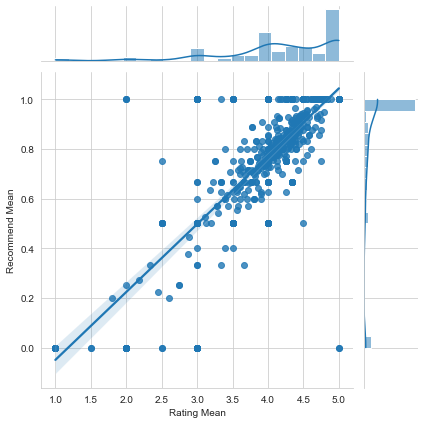

In [36]:
temp = (dft.groupby('Product ID')[["Rating","Recommend Flag", "Customer Age"]]
        .aggregate(['count','mean']))
temp.columns = ["Count","Rating Mean","Recommend Flag Count",
                 "Recommend Mean","Customer Age Count","Customer Age Mean"]
temp.drop(["Recommend Flag Count","Customer Age Count"], axis=1, inplace =True)
sns.jointplot(x='Rating Mean', y='Recommend Mean', data=temp, kind='reg')

In [37]:
ss.pearsonr(temp['Rating Mean'], temp['Recommend Mean'])

(0.7961478196812519, 1.6074854843209124e-257)

In [35]:
dft.dtypes

Product ID         int64
Category          object
Subcategory1      object
SubCategory2      object
Location          object
Channel           object
Customer Age       int64
Review Title      object
Review Text       object
Rating             int64
Recommend Flag     int64
dtype: object

In [38]:
temp[(temp['Rating Mean'] ==5 )& (temp['Recommend Mean'] == 0)]

,Count,Rating Mean,Recommend Mean,Customer Age Mean
Product ID,,,,
53,1,5.0,0.0,29.0
776,1,5.0,0.0,56.0


In [39]:
dft[dft['Product ID'].isin([776,53])]

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
12032,776,Initmates,Intimate,Legwear,Gurgaon,Web,56,Really comfy socks,"Yes,you need these, so comfortable - and wash ...",5,0
17968,53,General,Bottoms,Shorts,Gurgaon,Web,29,NaN,"Very cute shorts. sadly, after one wash they b...",5,0


In [40]:
temp.rename(mapper={'Rating Mean':'Rating_Mean', 'Recommend Mean': 'Recommended_Mean', 'Customer Age Mean': 'Age_Mean'}, 
             axis=1,inplace=True)
temp

,Count,Rating_Mean,Recommended_Mean,Age_Mean
Product ID,,,,
1,3,4.000000,0.666667,36.666667
2,1,4.000000,1.000000,28.000000
3,1,5.000000,1.000000,36.000000
4,1,5.000000,1.000000,28.000000
5,1,5.000000,1.000000,39.000000
...,...,...,...,...
1200,1,3.000000,0.000000,24.000000
1202,9,4.333333,1.000000,42.000000
1203,7,4.428571,0.714286,39.142857


In [42]:
from statsmodels.formula.api import ols

In [43]:
results = ols('Recommended_Mean ~ Rating_Mean', data=temp).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Recommended_Mean   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     2025.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          1.61e-257
Time:                        11:59:27   Log-Likelihood:                 364.09
No. Observations:                1172   AIC:                            -724.2
Df Residuals:                    1170   BIC:                            -714.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3235      0.026    -12.464      0.000      -0.374      -0.273
Rating_Mean     0.2736      0.006     45.005      0.000       0.262       0.286
==============================================================================
Omnibus:                      154.960   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1020.244
Skew:                          -0.401   Prob(JB):                    2.86e-222
Kurtosis:                       7.500   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Rating_Mean'>

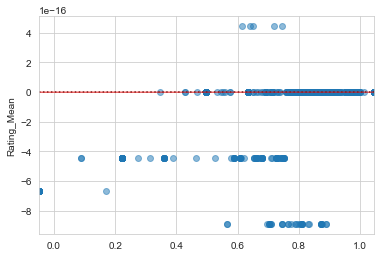

In [44]:
model_fitted_y = results.fittedvalues
model_residuals = results.resid
model_abs_resid = np.abs(model_residuals)

sns.residplot(model_fitted_y, temp['Rating_Mean'], data=temp, 
                              lowess=True, 
                              scatter_kws={'alpha': 0.5}, 
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

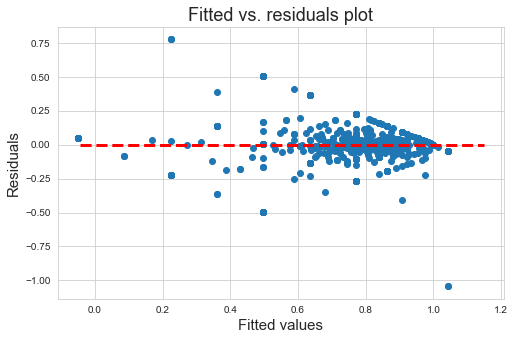

In [45]:
plt.figure(figsize=(8,5))
p = plt.scatter(x=model_fitted_y, y=model_residuals)
xmin=min(model_fitted_y)
xmax = max(model_fitted_y)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

In [46]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept=True).fit(np.array(temp['Rating_Mean']).reshape(-1,1), temp['Recommended_Mean'])

In [47]:
print(LR.coef_)
print(results.params)


[0.27358224]
Intercept     -0.323460
Rating_Mean    0.273582
dtype: float64


### Numerical vs Categorical Variables

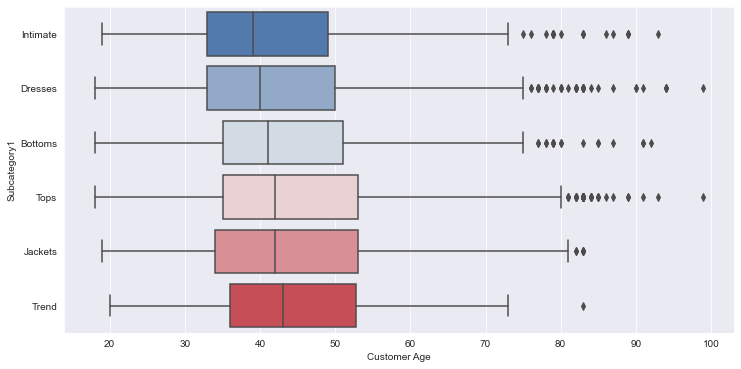

In [52]:
plt.subplots(figsize=(12,6))
sns.set_style('darkgrid')
sns.boxplot(x=dft['Customer Age'], y = dft['Subcategory1'], palette=sns.diverging_palette(250, 10, n=6));

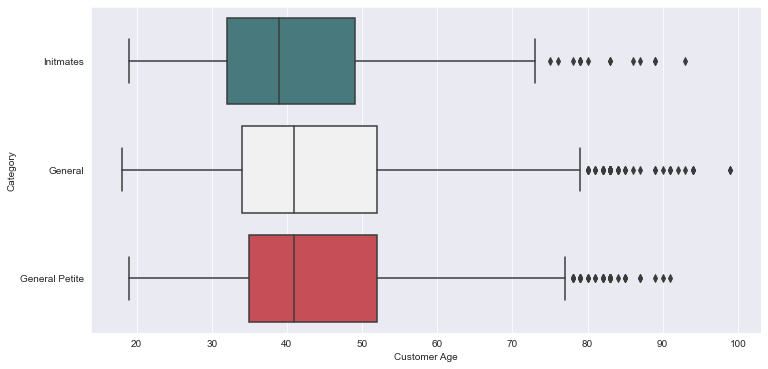

In [54]:
plt.subplots(figsize=(12,6))
sns.set_style('darkgrid')
sns.boxplot(x=dft['Customer Age'], y = dft['Category'], palette=sns.diverging_palette(200, 10, n=3));

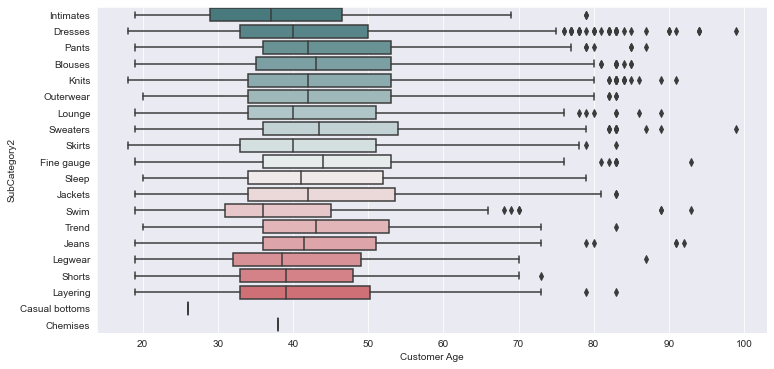

In [55]:
plt.subplots(figsize=(12,6))
sns.set_style('darkgrid')
sns.boxplot(x=dft['Customer Age'], y = dft['SubCategory2'],palette=sns.diverging_palette(200, 10, n=20));

In [56]:
dff = dft[['Customer Age', 'Category']]
dff1 = dff[dff['Category'] == 'Initmates']['Customer Age']
dff2 = dff[dff['Category'] == 'General']['Customer Age']
dff3 = dff[dff['Category'] == 'General Petite']['Customer Age']

In [57]:
dff.groupby('Category').mean()

,Customer Age
Category,
General,43.426712
General Petite,43.400153
Initmates,41.290323


In [58]:
dff1

0        33
13       44
25       31
28       53
34       39
         ..
23249    34
23318    39
23425    23
23438    68
23476    27
Name: Customer Age, Length: 1426, dtype: int64

In [59]:
ss.f_oneway(dff1, dff2, dff3)

F_onewayResult(statistic=19.923191829766157, pvalue=2.2650514208092683e-09)

In [67]:
dff = dff.rename(columns={"Customer Age": "Customer_Age"})

In [68]:
results = ols('Customer_Age ~ C(Category)', data=dff).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Customer_Age   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     19.92
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           2.27e-09
Time:                        12:26:46   Log-Likelihood:                -88926.
No. Observations:               22628   AIC:                         1.779e+05
Df Residuals:                   22625   BIC:                         1.779e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        43.4267      0.107    407.573      0.000      43.218      43.636
C(Category)[T.General Petite]    -0.0266      0.175     -0.152      0.880      -0.370       0.317
C(Category)[T.Initmates]         -2.1364      0.343     -6.226      0.000      -2.809      -1.464
==============================================================================
Omnibus:                      916.673   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1027.304
Skew:                           0.519   Prob(JB):                    8.39e-224
Kurtosis:                       2.881   Cond. No.                         4.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
import statsmodels.api as sm
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Category),6.045897e+03,2.0,19.923192,2.265051e-09
Residual,3.432894e+06,22625.0,NaN,NaN


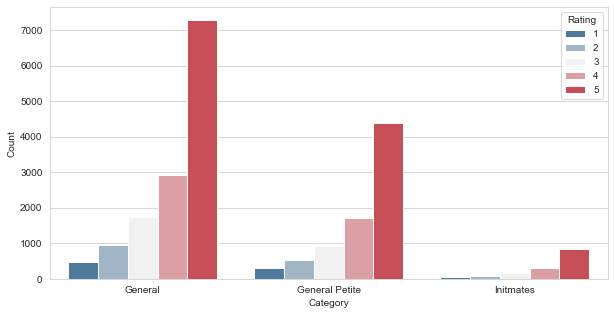

In [71]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,5))
a = dft[['Category', 'Rating']]\
.groupby(['Category'])['Rating']\
.value_counts()\
.rename('Count')\
.reset_index()\
.sort_values('Rating')
sns.barplot(x='Category', y = 'Count', hue='Rating', data=a, palette=sns.diverging_palette(240, 10, n=5, center="light"));

In [72]:
def percentagebarplot(x, y, hue, data, ax=None, n=5):
    sns.barplot(x =x, y =y, hue=hue,\
                data = data[[x, hue]]\
                .reset_index(drop=True)\
                .groupby([x])[hue]\
                .value_counts(normalize=True)\
                .rename('Percentage').mul(100)\
                .reset_index()\
                .sort_values(hue),\
                palette=sns.diverging_palette(240, 10, n=n, center="light"),\
               ax =ax)

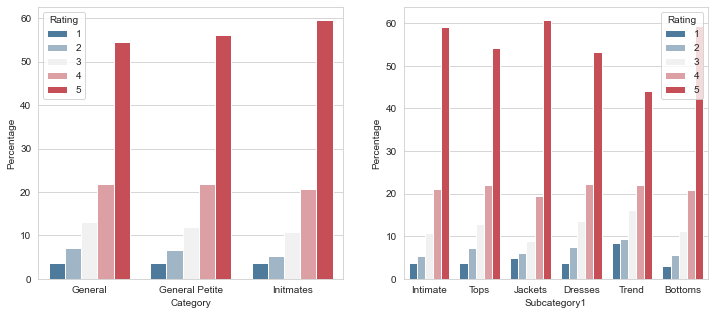

In [74]:
f, ax = plt.subplots(1,2, figsize=(12,5))

percentagebarplot(x='Category', y ='Percentage', hue='Rating',  data=dft, ax=ax[0], n=5)
percentagebarplot(x='Subcategory1', y ='Percentage', hue='Rating',  data=dft, ax=ax[1], n=5)
plt.show()

In [75]:
a

,Category,Rating,Count
4,General,1,479
9,General Petite,1,291
14,Initmates,1,51
3,General,2,950
8,General Petite,2,524
13,Initmates,2,75
2,General,3,1740
7,General Petite,3,929
12,Initmates,3,154
1,General,4,2910


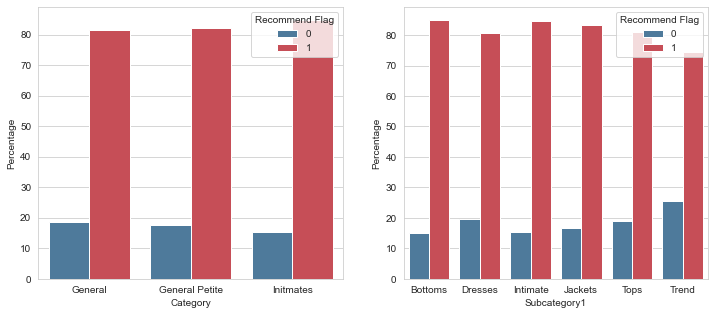

In [76]:
f, ax = plt.subplots(1,2, figsize=(12,5))

percentagebarplot(x='Category', y ='Percentage', hue='Recommend Flag',  data=dft, ax=ax[0], n=2)
percentagebarplot(x='Subcategory1', y ='Percentage', hue='Recommend Flag',  data=dft, ax=ax[1], n=2)
plt.show()


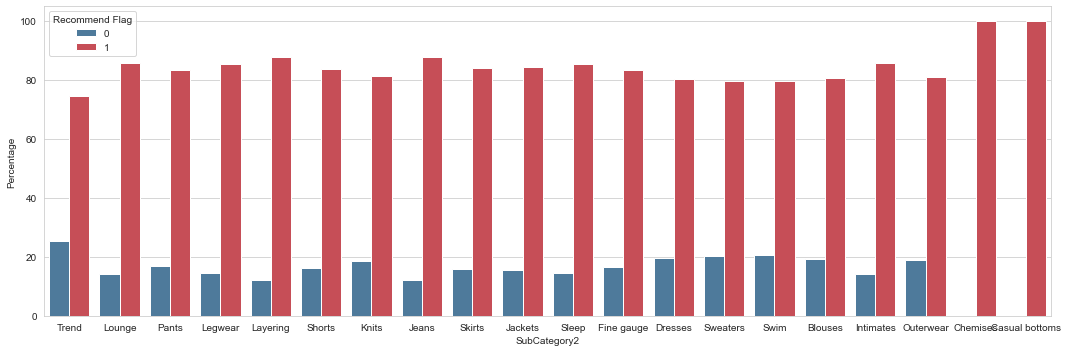

In [77]:
f, ax = plt.subplots(figsize=(15,5))

percentagebarplot(x='SubCategory2', y ='Percentage', hue='Recommend Flag',  data=dft, n=2)
#percentagebarplot(x='Department Name', y ='Percentage', hue='Recommended IND',  data=dft, ax=ax[1], n=2)
plt.tight_layout()
plt.show()

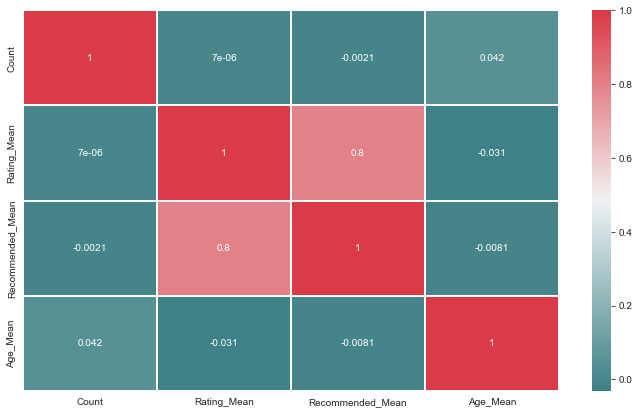

In [78]:
f, ax = plt.subplots(figsize=(12,7))

sns.heatmap(temp.corr(),annot=True, cmap=sns.diverging_palette(200, 10, n=100), linecolor='white',lw=0.1);

### Text Analysis

In [80]:
pd.set_option('max_colwidth', 500)
dft[['Review Title','Review Text', 'Rating']].sample(20)

,Review Title,Review Text,Rating
15156,Pretty!,Love! love! love this tunic! i was worried about getting the regular size because they don't have my size in petite anymore but im glad i took a chance getting the regular size. my daughter said its just perfect on me. very pretty!,5
10218,Gorgeous; consider sizing up,"This is just as it looks. a minimalist, elegant, dark navy skirt that provides a classic feminine shape and looks like it could last for years. it is straight, so you might want to consider sizing up unless you're quite slender. i'm 5'10"" and 160 and am sending back a m for a l. excited to get my new skirt and to wear it.",5
13421,Very snug,"I tried this on in the store in a size 4, and it was too tight. i'd need a 6 or possibly a 8, if i wanted a little room. (the store didn't have either.) though it was too tight, it was very flattering and more comfortable than i assumed. the neckline is a little awkward. the front straps of my racerback bra peeked out the sides. this might not be an issue with a bigger size.",4
9441,Too small!,"Had to return this for a couple of reasons: 1) was too small! it's made like one of those tiny mittens that stretches to fit any size hand. i didn't bother to order a size up because i wasn't sure whether to go from a small to a medium or to a large. 2) the main color isn't grey, like the picture. it's a black and white checkered pattern. so, it doesn't look at all grey irl._x000D_\n_x000D_\ni'm still recommending because, if you get the right size, and like the colors, it will be a nice, li...",2
12040,Perfect slim fit,"I'm 32b-26-36, straight and slim, and the 0 fits like a glove. it's a nice change from all these loose, billowy (sometimes sack or tent like) dresses. if you are busty or have a broad rib cage, you'll need to size up for sure. the slip is fitted and im wondering if it will stay put. love all the colors in this dress - navy was better for me, the white washed me out and was just underwhelming. the band of lace hits high on my waist at a spot that is flattering and slimming which doesn't happe...",4
14920,Petites please!?,I absolutely adore this skirt! sadly it was a lot of skirt for me- i'm 5 feet nothing and it would have been too much fabric to hem. wish this skirt came in a petite size. great color and a fun option for the fall wedding season!,3
6412,Awesome skirt,"Fits just like on the model, even though im 5'4''. really happy with this casual summer find.",5
7919,Unique design,This really is a pretty top. i do wish it was a little thicker but it's not as see-through as other tees i've seen.,4
16595,... just not for me...,"I was very excited to try out this dress. i've been looking for a velvet dress for a couple of years now, and.. i'm not digging this one. the fabric itself was a let down right off the bat. it's cheap looking to me. i've seen nice velvet and this is very shiny, thin, and slightly sheer! the dress cut itself is what i was expecting, a loose baby doll type dress. the length hit above my knees. the overall effect made me feel very ""gypsy-ish""...my husband gave a firm no! when he saw me walk out of",3
3190,NaN,Retailer sleep pants are my favorite...the only sleep pants i will wear. fit is perfect. flowing shape and ultra-soft fabric feel like a little bit of luxury. first thing i put on when i get home from work!,5


In [81]:
def cleanText(text):
    
    #Remove non-alpha characters
    text = re.sub(r'[^a-zA-Z0-9 ]', '',text)
    #Remove multiple spaces, replace by single space
    text = re.sub(r'  +', ' ', text)
    #Lower case all 
    text = text.lower()
    
    return text

In [83]:
import re 

In [84]:
t = "Awesome             shirt...great'"''" transition £!*$*(Q&@Q@_&^%$£~#!) into fall.\n somewhat sheer. extremely comfortable!"
re.sub(r'[^a-zA-Z0-9 ]+', '',t)

'Awesome             shirtgreat transition QQ into fall somewhat sheer extremely comfortable'

In [85]:
dft['Clean Text'] = dft['Review Text'].apply(lambda x: cleanText(x))

Text(0.5, 1.0, 'Comparision of Processed vs Unprocessed Text w.r.t text length metrics')

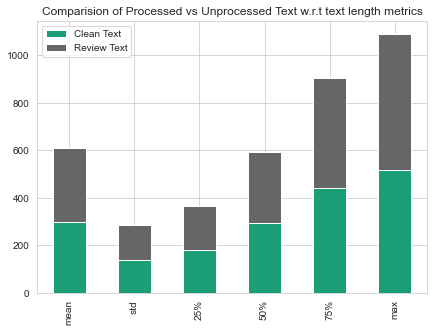

In [86]:
f, ax = plt.subplots(figsize=(7,5))
a = dft['Clean Text'].apply(lambda x: len(x)).describe().drop(['count','min'])
b = dft['Review Text'].apply(lambda x: len(x)).describe().drop(['count','min'])
temp = pd.DataFrame({'Clean Text':a, 'Review Text':b})
temp.plot.bar(stacked=True, colormap='Dark2', ax=ax);
ax.set_title("Comparision of Processed vs Unprocessed Text w.r.t text length metrics")

In [87]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

tokens = []
for row in dft['Clean Text']:
    for tk in row.split():
        if tk not in stop_words and (tk != ''):
            tokens.append(tk)

In [88]:
len(tokens)

668027

In [90]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tag import pos_tag

from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [91]:
dft['Clean Tokens'] = dft['Clean Text']\
.apply(lambda x: [w for w in nltk.tokenize.word_tokenize(x) if w not in stop_words and (w != '')])

In [92]:
dft['Clean Tokens'].apply(lambda x: len(x)).sum()

667862

In [93]:
aa = [w for z in dft['Clean Tokens'] for w in z]
aaa = set(aa)
bbb = set(tokens)
len(set(aa)) - len(set(tokens))
asda = [w for w in bbb if w not in aaa]

In [94]:
a12 = " ".join(['gonna', 'gotta', 'wanna', 'cannot'])
nltk.tokenize.word_tokenize(a12)

['gon', 'na', 'got', 'ta', 'wan', 'na', 'can', 'not']

In [95]:
pos_tag(['being'])

[('being', 'VBG')]

In [96]:
def Lemma(tokens):
    lemma = WordNetLemmatizer()
    lemma_sent = []
    
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos= 'n'
        elif tag.startswith('VB'):
            pos= 'v'
        else:
            pos = 'a'
        lemma_sent.append(lemma.lemmatize(word, pos))
    
    return lemma_sent

In [97]:
tokens_ = Lemma(tokens)

In [98]:
freq = nltk.FreqDist(tokens_)
items = sorted(freq.items(), key= lambda kv: kv[1], reverse= True)

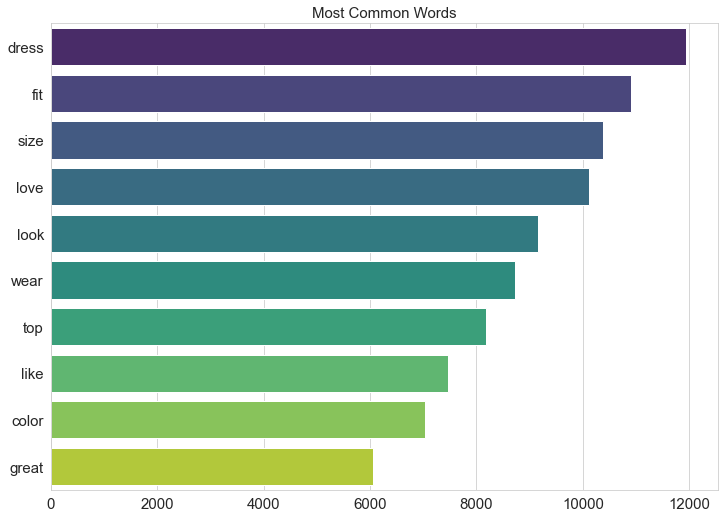

In [99]:
k,v = zip(*items)

fig, ax = plt.subplots(figsize=(10,7))
sns.set_style('whitegrid')

sns.barplot(x=list(v[:10]), y=list(k[:10]), palette ='viridis')
plt.tight_layout()
plt.title('Most Common Words', size=15)
plt.tick_params(labelsize=15)

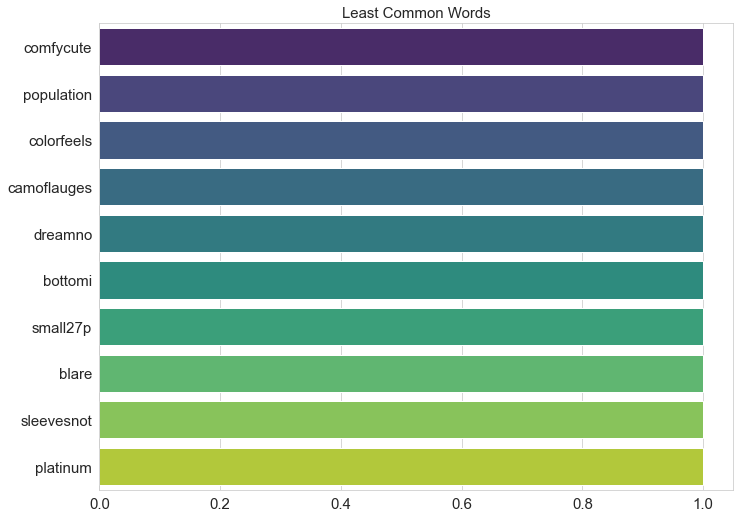

In [100]:
fig, ax = plt.subplots(figsize=(10,7))
sns.set_style('whitegrid')

sns.barplot(x=list(v[-10:]), y=list(k[-10:]), palette ='viridis')
plt.tight_layout()
plt.title('Least Common Words', size=15)
plt.tick_params(labelsize=15)
plt.show()

In [105]:
Subcategory1_Name = list(dft['Subcategory1'].unique())
token_labels = []
for i, dep in enumerate(Subcategory1_Name):
    token_labels.append([])
    for row in dft[dft['Subcategory1'] == dep]['Clean Text']:
        for tk in row.split():
            if tk not in stop_words and (tk != ''):
                token_labels[i].append(tk)

# Lemmatize tokens
token_labels_lem = []
for i in range(len(Subcategory1_Name)):
    token_labels_lem.append(Lemma(token_labels[i]))

In [106]:
freq_label = []
item_label = []
for i in range(len(Department_Name)):
    
    freq_label.append(nltk.FreqDist(token_labels_lem[i]))
    item_label.append(sorted(freq_label[i].items(), key= lambda kv: kv[1], reverse = True))

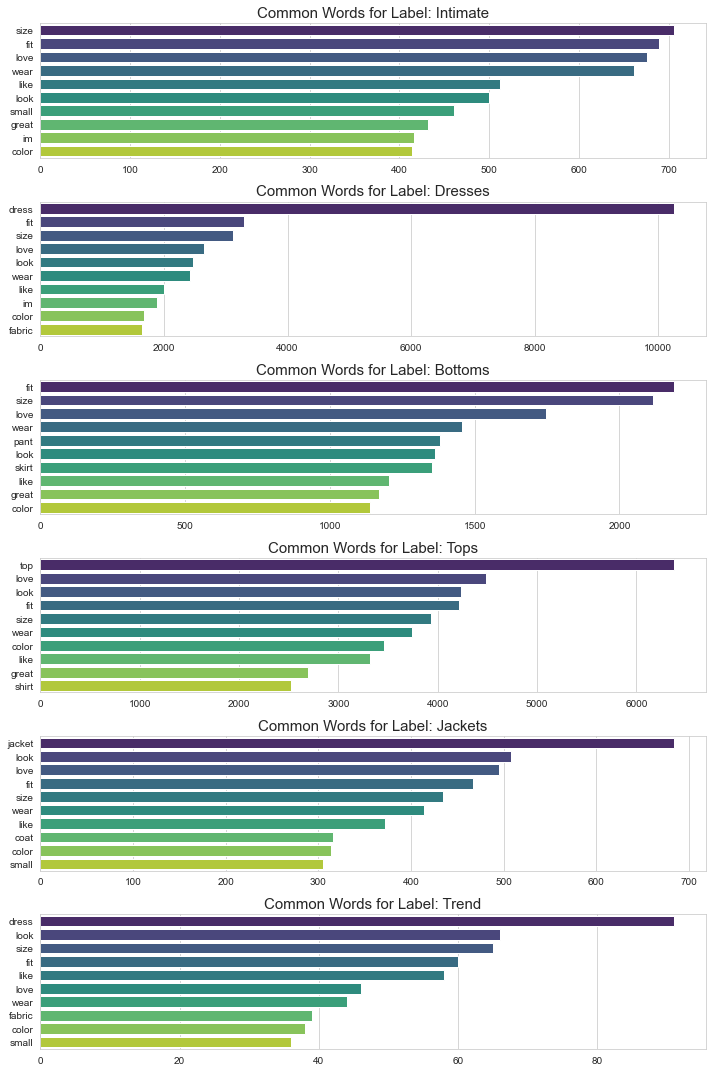

In [107]:
fig, axs = plt.subplots(6, figsize=(10,15))

for i in range(len(Department_Name)):
    
    k1,v1= zip(*item_label[i])
    sns.barplot(y =list(k1[:10]),x= list(v1[:10]), palette='viridis',ax=axs[i])
    plt.tight_layout()
    axs[i].set_title('Common Words for Label: {}'.format(Department_Name[i]), size=15)

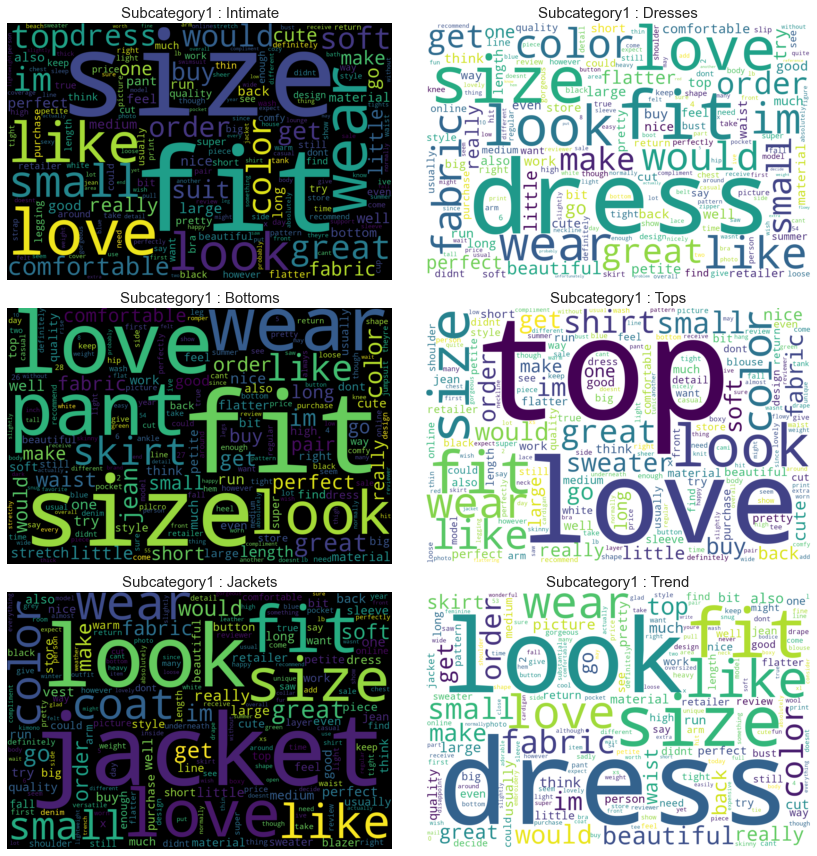

In [111]:
from wordcloud import WordCloud

def wordcloud(freqd,c):
    if c%2 == 0:
        color = 'Black'
    else:
        color = 'white'
    wc = WordCloud(width=1200, height=800,
                  background_color=color,
                  max_words=200)
    wc = wc.generate_from_frequencies(freqd)
    return wc
    fig=plt.figure(figsize=(6,4))
        
fig = plt.figure(figsize=(12,12))

wc1 = [None] *6
for i in range(len(Subcategory1_Name)):
    axs = fig.add_subplot(3,2,i+1)
    wc1[i] = wordcloud(dict(item_label[i]),i)
    axs.imshow(wc1[i], interpolation='bilinear')
    axs.axis('off')
    axs.set_title("Subcategory1 : {}".format(Subcategory1_Name[i]), size=15)

plt.tight_layout()
plt.show()

In [112]:
dft[dft['Subcategory1'] == "Intimate"]['Clean Text']

0                                                                                                                                                                                                                                                                                                                                                                                                               absolutely wonderful silky and sexy and comfortable
13                                                                              bought the black xs to go under the larkspur midi dress because they didnt bother lining the skirt portion grrrrrrrrrrrx000dmy stats are 34a282936 and the xs fit very smoothly around the chest and was flowy around my lower half so i would say its running bigx000dthe straps are very pretty and it could easily be nightwear toox000dim 56 and it came to just below my knees
25                                                                                              

In [113]:
dft.dtypes

Product ID         int64
Category          object
Subcategory1      object
SubCategory2      object
Location          object
Channel           object
Customer Age       int64
Review Title      object
Review Text       object
Rating             int64
Recommend Flag     int64
Clean Text        object
Clean Tokens      object
dtype: object

### Sentiment Analysis

In [117]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

import string

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...


In [118]:
SIA = SentimentIntensityAnalyzer()

In [119]:
dft['Polarity Score']=dft["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
dft['Neutral Score']=dft["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
dft['Negative Score']=dft["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
dft['Positive Score']=dft["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
dft['Sentiment']=''
dft.loc[dft['Polarity Score']>0,'Sentiment']='Positive'
dft.loc[dft['Polarity Score']==0,'Sentiment']='Neutral'
dft.loc[dft['Polarity Score']<0,'Sentiment']='Negative'


In [120]:
pd.set_option('max_colwidth', 50)
dft.head()


,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Clean Text,Clean Tokens,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky and sexy and comfor...,"[absolutely, wonderful, silky, sexy, comfortable]",0.8932,0.272,0.000,0.728,Positive
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,love this dress its sooo pretty i happened to ...,"[love, dress, sooo, pretty, happened, find, st...",0.9729,0.664,0.000,0.336,Positive
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,i had such high hopes for this dress and reall...,"[high, hopes, dress, really, wanted, work, ini...",0.9427,0.792,0.027,0.181,Positive
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,i love love love this jumpsuit its fun flirty ...,"[love, love, love, jumpsuit, fun, flirty, fabu...",0.5727,0.340,0.226,0.434,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,this shirt is very flattering to all due to th...,"[shirt, flattering, due, adjustable, front, ti...",0.9291,0.700,0.000,0.300,Positive


In [121]:
dft['Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

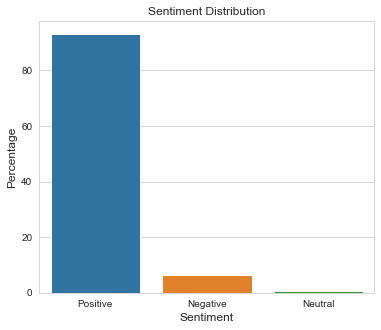

In [122]:
fig, axs = plt.subplots(figsize=(6,5))

sns.barplot(x=dft['Sentiment'].unique(),
            y=dft['Sentiment'].value_counts(normalize=True).mul(100),
            data=dft,
            );
axs.set_xlabel('Sentiment', size=12)
axs.set_ylabel('Percentage', size=12)
axs.set_title('Sentiment Distribution');

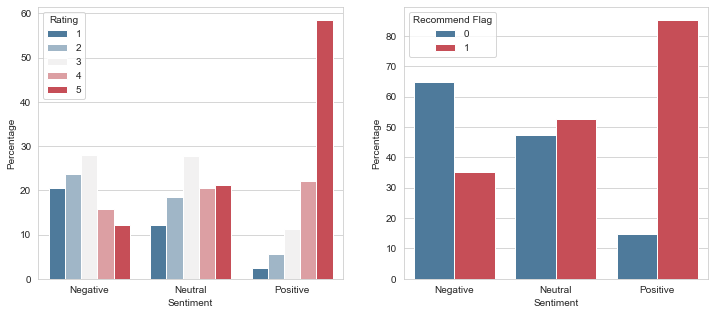

In [124]:
f, ax = plt.subplots(1,2, figsize=(12,5))

percentagebarplot(x='Sentiment', y ='Percentage', hue='Rating',  data=dft, ax=ax[0], n=5)
percentagebarplot(x='Sentiment', y ='Percentage', hue='Recommend Flag',  data=dft, ax=ax[1], n=2)
plt.show()

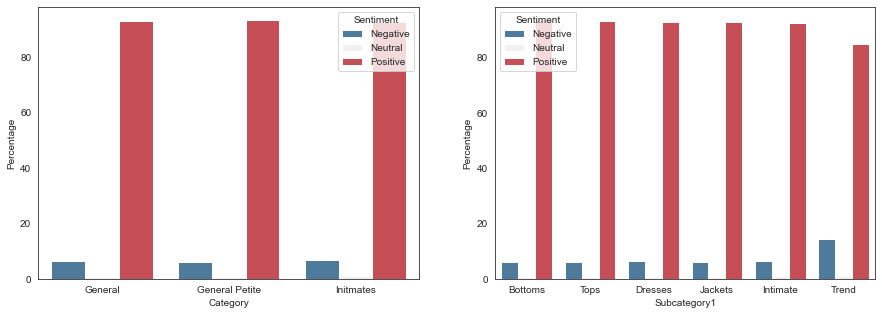

In [126]:
f, ax = plt.subplots(1,2, figsize=(15,5))
sns.set_style('white')
percentagebarplot(x='Category', y ='Percentage', hue='Sentiment',  data=dft, ax=ax[0], n=3)
percentagebarplot(x='Subcategory1', y ='Percentage', hue='Sentiment',  data=dft, ax=ax[1], n=3)
plt.show()


### Naive Byes Classifier

In [129]:
featLab = list(zip(dft['Clean Tokens'], dft['Recommend Flag']))

word_features = list(dict(items).keys())[:2000]

def find_features(doc):
    
    ## For each review, create a feature dictionary recording which features are present and not. 
    ## for example first review has these features ['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable']
    ## only these will be True reset all False. 
    
    words = set(doc)
    features = {}
    for w in word_features:
         features[w] = (w in words)
    return features

featureset = [(find_features(txt), label ) for  (txt, label) in featLab]

In [130]:
train_set = featureset[:15000]
test_set = featureset[15000:]


In [131]:
clf = nltk.NaiveBayesClassifier.train(train_set)

In [132]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(clf, test_set))*100)
print(clf.show_most_informative_features(40))

Classifier accuracy percent: 87.6114315679077
Most Informative Features
                 dressed = True                1 : 0      =     23.9 : 1.0
                   awful = True                0 : 1      =     23.5 : 1.0
                  poorly = True                0 : 1      =     23.0 : 1.0
              unwearable = True                0 : 1      =     16.4 : 1.0
                horrible = True                0 : 1      =     16.2 : 1.0
                    asap = True                0 : 1      =     15.6 : 1.0
                   shame = True                0 : 1      =     15.2 : 1.0
                    mess = True                0 : 1      =     13.1 : 1.0
                 concept = True                0 : 1      =     12.6 : 1.0
                   cheap = True                0 : 1      =     12.3 : 1.0
                    poor = True                0 : 1      =     12.2 : 1.0
                  cooler = True                1 : 0      =     12.0 : 1.0
                    blah = T

### The first column displays the word, the second represents whether the word is not-recommended (0:1), or recommended (1:0). Lastly, the third column shows the ratio of occurrence.